# Distributions
A summary by Marcus Mähring: mmaehring@student.ethz.ch

Determinism is not always evident in nature, especially not in experimental physics. Flip a coin 100 times, and it may well turn up heads 55 times out of 100. Similar results appear in physics experiments:
 - A decaying radioactive source may give 95 counts on a geiger counter in one minute and 110 in the next. 

 - A 10V power supply across a resistor marked to 100$\Omega$ may give a reading of 103mA on an ammeter. 

These two physical phenomena can be modelled by basic laws to give exact results, but are modified by statistical <i> distributions</i> and thus give imprecise results. These distributions stem from causes such as <i>finite data sets</i>,<i> experimental accuracy</i>, and similar causes. 

The three fundamental distributions which appear all the time are the <b> binomial</b>,  <b> Poisson</b>, and the <b>Gaussian </b>. 
#### Properties of Distributions 

In [1]:
using StatsPlots, Roots, Distributions

One of the easiest distributions to look at is the one where we toss 4 coins and record the amount of heads (the amount of tails is then implicitly given).

Below, the probabilities for getting i heads is given, with i ranging from 0 to 4.

In [2]:
probabilities = [binomial(4, i)*(0.5)^i*(1-0.5)^(4-i) for i in 0:1:4];
println(probabilities*100, " %")
println("Sum of the probabilites: $(sum(probabilities)*100)%")

[6.25, 25.0, 37.5, 25.0, 6.25] %
Sum of the probabilites: 100.0%


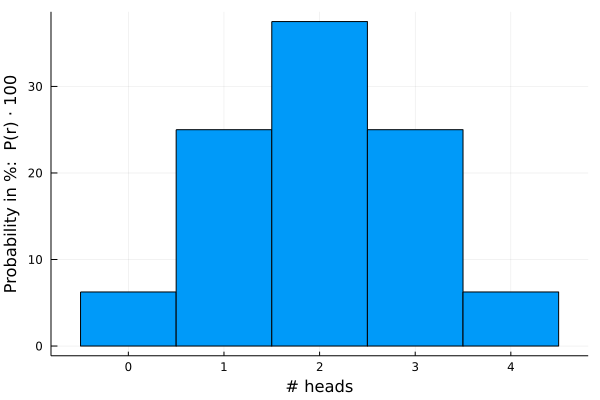

In [3]:
plot(0:1:4, probabilities*100, seriestype=:bar, bar_width=1, xlabel="# heads", ylabel="Probability in %:  P(r) ⋅ 100", label=:none)

##### The Law of Large Numbers 
The above probabilities give us the ratio of 1:4:6:4:1. Assume we toss a coin 16 times;

<table>
    <tr style="border-bottom:1px solid black"> 
        <th> # Heads </th>
        <th> r=4 </th>
        <th> r=3 </th>
        <th> r=2 </th>
        <th> r=1 </th>
        <th> r=0 </th>
    </tr>
    <tr>
        <th> Theory Predicts </th>
        <th> 1 </th>
        <th> 4 </th>
        <th> 6 </th>
        <th> 4 </th>
        <th> 1 </th>
    </tr>
    <tr>
        <th> Data </th>
        <th> 2 </th>
        <th> 7 </th>
        <th> 2 </th>
        <th> 4 </th>
        <th> 1 </th>
    </tr>
</table> <br>
That these numbers do not match is not suprising. We only have 16 events, and thus expect there to be significant statistical fluctuations. Simulating the experiment again on the computer, we get for 160, 1600, and 16000 trials. <br>
<table>
    <tr style="border-bottom:1px solid black"> 
        <th> Number of heads </th>
        <th> 4 </th>
        <th> 3 </th>
        <th> 2 </th>
        <th> 1 </th>
        <th> 0 </th>
    </tr>
    <tr>
        <th> 160 Tosses <th>
    </tr>
    <tr>
        <th> Theory Predicts </th>
        <th> 10 </th>
        <th> 40 </th>
        <th> 60 </th>
        <th> 40 </th>
        <th> 10 </th>
    </tr>
    <tr>
        <th> Data </th>
        <th> 10 </th>
        <th> 40 </th>
        <th> 61 </th>
        <th> 38 </th>
        <th> 11 </th>
    </tr>
    <tr style="border-top:1px solid black">
        <th> 1600 Tosses <th>
    </tr>
    <tr>
        <th> Theory Predicts </th>
        <th> 100 </th>
        <th> 400 </th>
        <th> 600 </th>
        <th> 400 </th>
        <th> 100 </th>
    </tr>
    <tr>
        <th> Data </th>
        <th> 125 </th>
        <th> 403 </th>
        <th> 567 </th>
        <th> 409 </th>
        <th> 96 </th>
    </tr>
    <tr style="border-top:1px solid black">
        <th> 16 000 Tosses <th>
    </tr>
    <tr>
        <th> Theory Predicts </th>
        <th> 1000 </th>
        <th> 4000 </th>
        <th> 6000 </th>
        <th> 4000 </th>
        <th> 1000 </th>
    </tr>
    <tr>
        <th> Data </th>
        <th> 1009 </th>
        <th> 3946 </th>
        <th> 5992 </th>
        <th> 4047 </th>
        <th> 1006 </th>
    </tr>
</table> <br>
Note how the agreement with the underlying distributions increases with the amount of trials. This is called the <i> Law of Large Numbers</i>. 

A more recent such example is the hunt for the Higgs boson. In the below GIF, a part of the hunt for the Higgs is visualized. Don't worry about the details, the important part is that the statistical fluctuations get smoothed out and a "bump" emerges in the background, which was not visible before the acquisition process.  

![SegmentLocal](HGammaGammaChannel.gif "segment")

#### Expectation values 
Assuming you know the probability distribution for some number $r$. We can easily compute the average number of 'successes', the expected $r$, written $\langle r \rangle$, defined by:
$$
    \langle r \rangle = \sum_r r P(r)
$$ <br>
where $P(r)$ is the probability of observing the result $r$. Meaning for the average numbers of heads: <br>
$$
    0 \times \frac{1}{16} + 1 \times \frac{4}{16} + 2 \times \frac{6}{16} + 3 \times \frac{4}{16} + 4 \times \frac{1}{16} = 2
$$ <br>
This is also extendable to functions of such random variables
$$
    \langle f \rangle = \sum_r f(r) P(r)
$$

<b> Expectation values are also additative: </b>
$$
    \langle f + g \rangle = \sum(f+g)P(r) = \sum f P(r) + \sum g P(r) = \langle f \rangle + \langle g \rangle 
$$
<br> though they do <i> not </i> multiply. In general $\langle fg \rangle \neq \langle f \rangle \langle g \rangle$, unless the variables are <i> independent </i>.

##### Limit toward infinity
For $n\longrightarrow\infty$ we expect $\bar{f} \longrightarrow \langle f \rangle$

#### Probability Density Distributions
In the case of <i> continuous </i> variables the above formulae need to be treated slightly differently. Say we are measuring the lengths of a large number of pieces of string randomly distributed between 10cm and 12cm. 

How many of these pieces will be <i> exactly </i> 11cm?

Answer: zero! Nevertheless, the probability of a value laying in a <i>range</i>, like between 10.9 and 11 cm is finite and sensible. It is described by the <i>probability density distribution</i>:
$$
    P(x\in[x_1, x_2]) = \int_{x_1}^{x_2}P(x) dx
$$
While probabilites are numbers, probability densities have dimensions inverse to the variable to which they apply. In this continous framework, we define expectation values as such:
$$
    \langle x \rangle = \int_{-\infty}^{\infty} x P(x) dx \qquad \qquad \langle f \rangle = \int_{-\infty}^{\infty} f(x) P(x) dx
$$
A "weighted" integral with the variable of which we desire an expectation value. 

### The Binomial Distribution
The binomial distribution describes the outcomes of $n$ identical trials (<i>Bernoulli trials</i>). More specifically, the probability of $r$ "successes" each with a probability $p$, and consequently probability of "failure" $1-p$. Trial in this context means an "experiment" of some kind. 

The use of the words "success" and "failure" is without any prejudice, one just has to frame the question in this way. 

<b>Example:</b> What is the probability that two out of four tossed coins turn up heads? The probability of getting "heads" is our success probability and tails our fail probability. 

#### The Binomial Probability Distribution Formula
In the case of the binomial distribution, we only care about the final collection of events, not the order in which the events occur. Thus we need to include all orders in which a certain set of events can occur into the formula. This is achieved by using the n choose r combinatorial expression:
$$
    _nC_r = \binom{n}{r} = \frac{n!}{r!(n-r)!}
$$
As there are $r$ successes, each with a probability $p$, and $n-r$ failures of probability $1-p$, meaning the total contribution is $p^r(1-p)^{n-r}$. 

The probability for $r$ successes in $n$ trials with probability $p$ is then described by the

##### Binomial probability density
$$
    P(r; p, n) = \binom{n}{r} p^r (1-p)^{n-r}
$$
The sum of all these events indeed equal one. This can be shown using the binomial expansion:
$$
    (x+y)^n = \sum_{k=0}^n \binom{n}{k}x^{n-k}y^k
$$
The binomial probability density for <i>something</i> happening (sum of the $P(r; p, n)$ over all possible $r$) coincides with expansion of $[p+(1-p)]^n = 1^n = 1$. 

Some properties:
 - Mean number of successes, $\langle r \rangle = np$
 - Variance $V(r) = np(1-p)$, meaning the standard deviation is $\sigma = \sqrt{np(1-p)}$
 
<b>Example: Detector efficiency</b>
 
A cosmic ray enters a detector consisting of chambers, each with a 95% detection efficiency. We assume we need at least three data points to identify a particle track.  How efficient at detecting tracks would a stack of three chambers be? Would using four or five chambers give a significant improvement? 

<b> Solution </b><br>
For three chambers: 
$$
    P(3; 0.95, 3) = 0.95^3
$$
four:
$$
    P = P(3; 0.95, 4) + P(4; 0.95, 4)
$$
five:
$$
    P = P(3; 0.95, 5) + P(4; 0.95, 5) + P(5; 0.95, 5)
$$

In [4]:
println("Three: ", round( (0.95^3)*100, digits=1), "%")
println("Four: ", round( (0.95^4 + binomial(4,3)*0.95^3*0.05)*100 , digits=1), "%")
println("Five: ", round( (0.95^5 + binomial(5,4)*0.95^4*0.05 + binomial(5,3)*0.95^3*0.05^2)*100 , digits=1), "%")

Three: 85.7%
Four: 98.6%
Five: 99.9%


### The Poisson Distribution
While the binomial distribution describes cases where <i>particular outcomes occur in a certain number of trials</i>, $n$, the Poisson probability formula likewise describes events with <i> a particular number of outcomes, but no information about the number of trials</i>. In this distribution, we are describing <i>sharp events occuring in a continuum</i>.

<b>Example:</b> A Geiger counter placed near a radioactive source produces definite clicks, but never "non-clicks". We never know how many trials we have, only an average amount of trial successes per time interval. Say we are observing a radioactive source, and we expect 10 counts per minute. Then say we observe 9 or 11 counts? This seems reasonable, yet if we next observe 5, 2, or 19: what is the probability that something has changed? 

We derive it by taking a limit in the binomial distribution. 
#### The Poisson Probability Formula
Suppose we have $\lambda$ events expected in an interval, which we split into $n$ small equal sections. We choose the partition to be so small, such that the probability of getting two or more events in one section can be discounted. This gives the probability that a given section contains an event equal to $p = \lambda / n$. 

The probability of having $r$ events in the $n$ sections can be calculated using the binomial formula:
$$
    P(r; \lambda/n, n) = \frac{\lambda^r}{n^r}\left(1-\frac{\lambda}{n} \right)^{n-r}\frac{n!}{r!(n-r)!}
$$
We now take the limit going to infinity $n \longrightarrow \infty$ we get:
$$
    \frac{n!}{(n-r)!} = n^r \qquad \qquad \left(1-\frac{\lambda}{n} \right)^{n-r} \longrightarrow \left(1-\frac{\lambda}{n} \right)^{n} = e^{-\lambda} 
$$
Thus we get the <b>Poisson Probability Formula</b>. The probability of obtaining $r$ events if the mean expected number is $\lambda$ is:
$$
    P(r; \lambda) = \frac{e^{-\lambda} \lambda^r}{r!}
$$

<b>Remarks</b>
For the distribution, it indeed fulfills the normalization: 
$$
    \sum_{r=0}^\infty P(r; \lambda) = 1
$$
and we have the fundamental relations:
$$
    \langle r \rangle = \lambda \qquad \qquad V(r) = \lambda \qquad \qquad \sigma = \sqrt{\lambda}
$$
Additionally, the Poisson distribution has the following characteristics: 
- For $\lambda > 1$, the most probable result is $0$. 
- For $\lambda \in \mathbb{N}_{>0}$, we have $P(\lambda; \lambda) = P(\lambda - 1; \lambda)$
- In calculating a series of Poisson probabilities, it is convenient to start with $P(0)$ and then multiply with $\lambda$ and divide with $1,2,3,4$ for the higher order contributions.

<b>Example: Fatal horse kicks</b>. Figures from the Prussian army pertaining to number of solders kicked to death by horses are the classical example of a data set describable by a Poisson distribution. 

In ten different army corps over twenty years, there were $122$ deaths, meaning that $\lambda$ -- the mean number of deaths in one corps in one year -- is $122/200 = 0.610$. Thus the probability of <i>zero</i> deaths occuring is 
$$
    P(0; 0.61) = \exp(-0.61)\cdot0.61^0 / 0! = \exp(-0.61) \approx 0.5434
$$
We can now predict the number of incidents w
here no fatality occured by multiplying the number of cases considered ($200$) and get $108.7$. 

There were actually $109$ incidents, meaning the agreement is $\sim 99.72 \%$ (!). The rest of the data is equally impressive:

<table>
    <tr>
        <th> Number of deaths in 1 corps in 1 year</th>
        <th> Actual number of such cases </th>
        <th> Poisson prediction </th>
    </tr>
    <tr>
        <th style="text-align:center"> 0</th>
        <td style="text-align:center"> 109 </td>
        <td style="text-align:center"> 108.7</td>
    </tr>
    <tr>
        <th style="text-align:center"> 1</th>
        <td style="text-align:center"> 65 </td>
        <td style="text-align:center"> 66.3</td>
    </tr>
    <tr>
        <th style="text-align:center"> 2</th>
        <td style="text-align:center"> 22 </td>
        <td style="text-align:center"> 20.2</td>
    </tr>
    <tr>
        <th style="text-align:center"> 3</th>
        <td style="text-align:center"> 3 </td>
        <td style="text-align:center"> 4.1</td>
    </tr>
    <tr>
        <th style="text-align:center"> 4</th>
        <td style="text-align:center"> 1 </td>
        <td style="text-align:center"> 0.6</td>
    </tr>
</table>

A sample of the mentioned remarks is are in the next plot. 

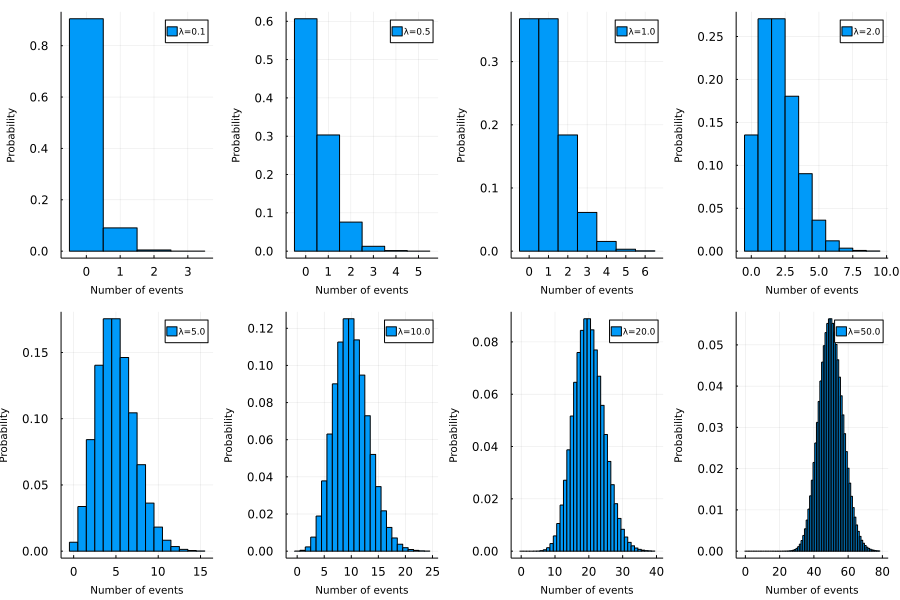

In [5]:
λs = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0];
plot_array = Array{Plots.Plot{Plots.GRBackend},1}()
for i in λs
    p = plot(Poisson(i), seriestype=:bar, bar_width=1, label="λ=$(i)", 
        xlabel="Number of events", xguidefontsize=7,
        ylabel="Probability", yguidefontsize=7
    );
    push!(plot_array, p)
end 
layout = @layout[a b c d; e f g h]
plot(plot_array..., layout=layout, size=(900, 600), # unpacking iterator is called "splatting" in Julia
    legendfontsize=6
) 

#### More horse kicks - The expected value and variance of a Poisson
In the previous example of the Prussian army, the mean was found to be $0.610$ and the variance to be $0.608$, almost identical. 

#### Poission approximation of a binomial distribution
I double-dare you to try to calculate a large enough binomial. Your computer/calculator will hate you due to all the messy factorials involved in the expression. 

The Poisson is thus a useful approximation of the binomial distribution where the number of trials $n$ is large and/or $p$ is small, saving us the trouble of calculating the involved binomial coefficients. 

<b>Example:</b> <br>
If there are $100$ trials with individual probability of success of $2\%$, we on average expect $2$ events. Comparing the binomial with the Poisson predictions gives:
<table>
    <tr> 
        <th> r </th>
        <th> 0 </th>
        <th> 1 </th>
        <th> 2 </th>
        <th> 3 </th>
        <th> 4 </th>
        <th> 5 </th>
        <th> 6 </th>
    </tr>
    <tr>
        <th> P(binomial) </th>
        <td> 13.3% </td>
        <td> 27.1% </td>
        <td> 27.3% </td>
        <td> 18.2% </td>
        <td> 9.0% </td>
        <td> 3.5% </td>
        <td> 1.1% </td>
    </tr>
    <tr>
        <th> P(Poisson) </th>
        <td> 13.5% </td>
        <td> 27.1% </td>
        <td> 27.1% </td>
        <td> 18.0% </td>
        <td> 9.0% </td>
        <td> 3.6% </td>
        <td> 1.2% </td>
    </tr>
</table>
The Poisson calculations are much easier than the binomial ones, especially using the remark for higher orders above. Try a few and see for yourself!

#### Two Poisson Distributions
If there are two separate events occuring according to Poisson statistics and we do not distinguish between the two (example a Geiger counter recording two types of radioactive decays giving identical clicks). Then the probability of $r$ events is also Poisson with mean equal to the sum of the respective means. 

Suppose the two event types are called $a$ and $b$, with individual means $\lambda_a$ and $\lambda_b$, so we know the probability of observing $r_a$ and $r_b$. A total of $r$ events could be all of type $b$, or one of type $a$ and the rest of type $b$, and so on. The total probability is given by:
$$
    P(r) = \sum_{r_a = 0}^r P(r_a; \lambda_a) P(r - r_a; \lambda_b) = e^{-\lambda_a}e^{-\lambda_b} \sum_{r_a = 0}^r \frac{\lambda_a^{r_a} \lambda_b^{r - r_a}}{r_a! (r - r_a)!} = e^{-(\lambda_a + \lambda_b)} \frac{(\lambda_a + \lambda_b)^r}{r!}\sum_{r_a = 0}^r \frac{r!}{r_a! (r-r_a)!}\left(\frac{\lambda_a}{\lambda_a + \lambda_b}\right)^{r_a} \left(\frac{\lambda_b}{\lambda_a + \lambda_b}\right)^{r - r_a}    
$$

The last term is just the binomial expansion of 
$$
    \frac{\lambda_a}{\lambda_a + \lambda_b} + \frac{\lambda_b}{\lambda_a + \lambda_b} = 1
$$
which gives the result:
$$
    P(r) = e^{-(\lambda_a + \lambda_b)} \frac{(\lambda_a + \lambda_b)^r}{r!}
$$

This shows that the sum of two Poisson distributed numbers is another Poisson process and can be extended to any number of such processes. 

### The Gaussian Distribution
The <b>Gaussian</b> or <b>normal</b> distribution is the most well known and useful (and universal) out of all distributions. 
$$
    P(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2}
$$
It's a symmetric bell-shaped curve about $\mu$ with its width controlled by the parameter $\sigma$ (which also turns out to be the standard deviation of the distribution). 

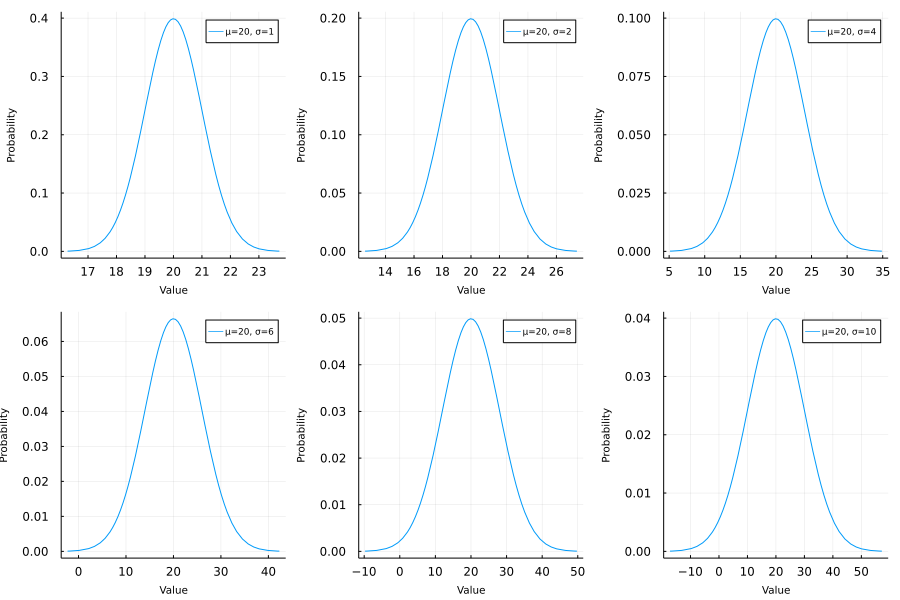

In [6]:
μ = 20
σ = [1, 2, 4, 6, 8, 10]
plt_array = Array{Plots.Plot{Plots.GRBackend},1}()
for i in σ
    p = plot(Normal(20, i), label="μ=20, σ=$(i)", 
        xlabel="Value", xguidefontsize=7,
        ylabel="Probability", yguidefontsize=7
    )
    push!(plt_array, p)
end

lyt = @layout[a b c; d e f]
plot(plt_array..., layout=lyt, size=(900, 600), # unpacking iterator is called "splatting" in Julia
    legendfontsize=6
) 

It is broad when $\sigma$ is large, and narrow when it is small. At $x = \mu \pm \sigma$, $P(x)$ falls to 0.61 of its peak value. These are also the points of inflection, meaning the second derivative is zero. The shape is independent of $\mu$, which only shifts the location along $x$. The <i>unit Gaussian</i> is defined as
$$
    \frac{1}{\sqrt{2}}e^{-x^2 /2}
$$

<b>Some important properties</b>

Normalization:
$$
    \int_{-\infty}^{\infty} P(x; \mu, \sigma) dx = 1
$$
The mean (and coincidentally mode and median) of the distribution: 
$$
    \int_{-\infty}^{\infty} x P(x; \mu, \sigma) dx = \mu
$$
Standard deviation: 
$$
    \int_{-\infty}^{\infty} (x-\mu)^2 P(x; \mu, \sigma) dx = \sigma^2
$$

The distribution indeed describes a myriad of different sorts of data, particularly pertaining to measurement errors. However, the <i>reasons</i> for this are complicated and should not be glossed over. 
> "everybody believes in the law of errors, the experimenters because they think it is a mathematical theorem, the mathematicians because they think it is an experimental fact."

<b>Proof ideas</b>
- Shift origin to 0, and use the basic Gaussian integral
- Change of variable $x = (x-\mu) + \mu$ and split the itnegral
- The last quantity can be proven using a Gaussian integral formula again. 


#### Important definite integrals
$$
    \int_{-\infty}^{\infty} e^{-ax^2}dx = \sqrt{\frac{\pi}{a}} \qquad \int_{-\infty}^{\infty}e^{-z^2/2}dz = \sqrt{2\pi} \\
    \int_{0}^{\infty} e^{-ax^2}dx = \frac{1}{2a} \qquad \int_{0}^{\infty}e^{-z^2/2}dz = 1 \\
    \int_{-\infty}^{\infty} x^2 e^{-ax^2}dx = \frac{1}{2a}\sqrt{\frac{\pi}{a}} \qquad \int_{-\infty}^{\infty} z^2 e^{-z^2/2}dz = \sqrt{2\pi} \\
    \text{Higher powers: } \\
    \int_{-\infty}^{\infty} x^{2n+1} e^{-ax^2}dx = \frac{n!}{2a^{n+1}} \qquad \int_{-\infty}^{\infty} z^{2n+1} e^{-z^2/2}dz = 2^n n! \\
    \int_{-\infty}^{\infty} x^{2n} e^{-ax^2}dx = \frac{(2n-1)!!}{2^n a^n}\sqrt{\frac{\pi}{a}} \\
    \int_{-\infty}^{\infty} z^{2n} e^{-az^2}dz = (2n-1)!!\sqrt{2\pi} \\
    \text{For any odd power, the symmetric integral vanishes: } \\
    \int_{-\infty}^{\infty} x^{2n+1} e^{-ax^2}dx = 0 
$$
<b>The indefinite integral <i>does not exist</i> as an analytical expression</b>. A taste of such indefinite integrals (two-tailed, going from -bound to bound): 
<table>
    <tr>
        <th> $1 \sigma$ </th>
        <th> $2 \sigma$ </th>
        <th> $3 \sigma$ </th>
        <th> $1.645\sigma$ </th>
        <th> $1.960 \sigma$ </th>
        <th> $2.576 \sigma$ </th>
        <th> $3.290 \sigma$ </th>
    </tr>
    <tr>
        <td> $68.73\%$ </td>
        <td> $95.46\%$ </td>
        <td> $99.73\%$ </td>
        <td> $90\%$ </td>
        <td> $95\%$ </td>
        <td> $99\%$ </td>
        <td> $99.9\%$ </td>
    </tr>
</table>
Reputable sources might list such values in a tabular form, but a sure solution is to use a computer implemented library. The exponential decay of the function also facilitates a numerical evaluation, posing the problem: 

> Given a function $f: [a_1, b_1] \times \dots \times [a_d, b_d] \in \mathbb{R}^d \to \mathbb{R}$ what is the value of the integral $\int_{a_1}^{b_1}\dots\int_{a_d}^{b_d} f(x_1, \dots, x_d)dx_1\dots dx_d$


In [8]:
### An example of such a numerical evaluation
function SimpsonRuleGaussian(μ, σ, a, b, N)
    Gauss(x) = exp(-(x-μ)^2 / (2*σ^2))/(σ*sqrt(2π))
    h = (b-a)/N
    x_steps = collect(a:h:b)
    x_midpoints = 0.5 .* (x_steps[begin:end-1] .+ x_steps[begin+1:end])
    
    integral = 2*sum([Gauss(i) for i in x_steps[begin+1:end-1]]) + 4*sum([Gauss(i) for i in x_midpoints])
    integral += Gauss(a) + Gauss(b)
    integral *= h/6
end

μ_ex = 0
σ_ex = 1
N_ex = 1000

eval_int = SimpsonRuleGaussian(μ_ex, σ_ex, -1, 1, N_ex)
real = cdf(Normal(μ_ex, σ_ex), 1) - cdf(Normal(μ_ex, σ_ex), -1)

println("The approximated value is $(eval_int), while the real value is $(real)")
println("The absolute error is: $(abs(real-eval_int)) \n")

eval_int = SimpsonRuleGaussian(μ_ex, σ_ex, -3.290, 3.290, N_ex)
real = cdf(Normal(μ_ex, σ_ex), 3.290) - cdf(Normal(μ_ex, σ_ex), -3.290)

println("The approximated value in case 2 is $(eval_int), while the real value is $(real)")
println("The absolute error is: $(abs(real-eval_int))")

The approximated value is 0.6826894921370916, while the real value is 0.6826894921370861
The absolute error is: 5.551115123125783e-15 

The approximated value in case 2 is 0.998998126172369, while the real value is 0.9989981261724286
The absolute error is: 5.950795411990839e-14


###### Rule of thumb: About one third of the error bars should miss the curve. 
Apparently, some people complain that the fit is "too good" otherwise. 

Sometimes you are interested in the probability of a value straying in only one direction instead of straying in any direction from a mean. For the latter, we calculate the latter we use a so called <i>two-tailed</i> probability and for the former the <i>one-tailed<i> probability. 

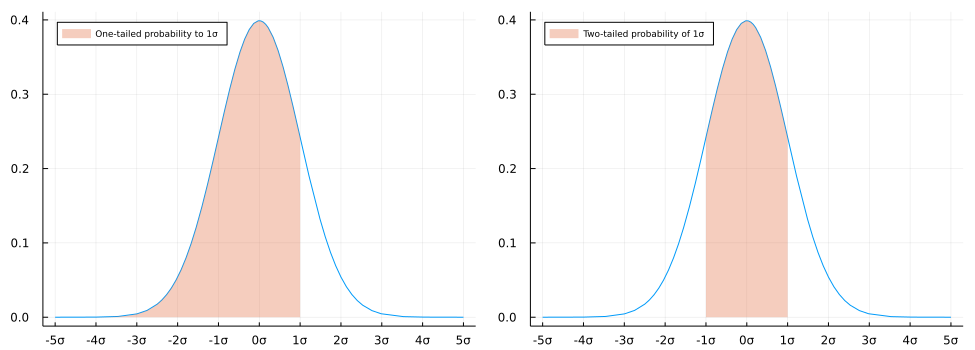

In [9]:
fct(x) = pdf(Normal(0, 1), x)
array = collect(-5:0.1:5)
POI1 = array[array .<= 1]
POI2 = array[-1 .<= array .<= 1]
one_tail = plot(fct, xticks = xticks = (-5:5, [string(i)*"σ" for i in -5:5]), label=:none)
plot!(POI1, fct.(POI1), fillrange = zeros(Int, length(POI1)), 
      fillalpha = 0.35, c = 2, lw=0,
      label = "One-tailed probability to 1σ", 
      legend = :topleft, legendfontsize=6
);
two_tail = plot(fct, xticks = xticks = (-5:5, [string(i)*"σ" for i in -5:5]), label=:none)
plot!(POI2, fct.(POI2), fillrange=zeros(Int, length(POI2)),
    fillalpha = 0.35, c = 2, lw=0,
    label=  "Two-tailed probability of 1σ",
    legend=:topleft, legendfontsize=6
);
lyt = @layout[a b]
plot(one_tail, two_tail, layout=lyt, size=(975, 350), dpi=100)

#### The Gaussian as limit of the Poisson and binomial
From the plots of the Poisson we can see that the distribution tends to a Gaussian for large $\lambda$ with $\mu=\lambda$ and $\sigma=\sqrt{\lambda}$. in such cases the Gaussian might be a convenient approximation. "Large" is here intentionally ambiguous, as one can decide how good the agreement should be, where some people are ok with a number as low as $\lambda = 5$, but 10 is probably safer

Proof
Let $r=\lambda + x$ and use Stirling's approximation
$$
     \ln(r!) \approx r \ln{r} - r + \ln{\sqrt{2\pi r}}
$$
Then, taking the logarithm of the Poisson probability formula:
$$
    \ln P(r; \lambda) \approx -\lambda + r\ln\lambda - (r\ln r - r) - \ln\sqrt{2\pi\lambda} \\
    \approx -\lambda + r \left\{ \ln \lambda - \ln\left[\lambda \left(1+\frac{x}{\lambda} \right) \right] \right\} + (\lambda + x) - \ln\sqrt{2\pi\lambda}
$$
Additionally employ the expansion $\ln(1+z) \approx z - z^2/2 + ...$
$$
    \ln P(r; \lambda) \approx x - (\lambda + x) \left( \frac{x}{\lambda} - \frac{x^2}{2\lambda^2}\right) - \ln\sqrt{2\pi\lambda} \\
    \approx -\frac{x^2}{2\lambda} - \ln\sqrt{2\pi\lambda}
$$
Finally, exponatiating:
$$
    P(x) = \frac{e^{-x^2/2\lambda}}{\sqrt{2\pi\lambda}}
$$
which matches the Gaussian probability formula for $\mu=\lambda$ and $\sigma = \sqrt{\lambda}$.  $\blacksquare$

We have an expression for the probability:
$$
   p(x; \lambda) = \int_{x+\frac{1}{2}}^{x-\frac{1}{2}} f(x;\lambda, \sqrt{\lambda}) dx
$$

<i>Note:</i> When x becomes very large (or $\lambda$), the additional sum of ½ is <i>not</i> relevant, and the above approximation is no longer good and may just be replaced with a Gaussian, $f(x, \lambda, \sqrt{\lambda})$ (of which we can calculate the CDF). 

<b>Example:</b>
If $\lambda = 5.3$ then the probability of two events or less is $10.2\%$, using the Poisson formula. Approximating the histogram of the Poisson by the smooth curve of the Gaussian, the <b>appropriate value for the Gaussian is <i>halfway-between the possible discrete values</i></b>:

<b>One-tailed</b>
$$
    \int_0^{x+\frac{1}{2}} f(x;\lambda, \sqrt{\lambda}) dx
$$

In the value between 2 and 3 at 2.5 events. This is $\frac{5.3 - 2.5}{\sqrt{5.3}}\approx 1.22\sigma$ from the mean, meaning we have a one-tailed probability of $11.1\%$. 

Alternatively, calculate: $\text{CDF}(f(x, \lambda, \sqrt{\lambda}), 2.5)$

In [10]:
cdf(Normal(5.3, √5.3), 2.5) * 100

11.194632105603898

Below, a graphical depiction of the general approximation is given: 

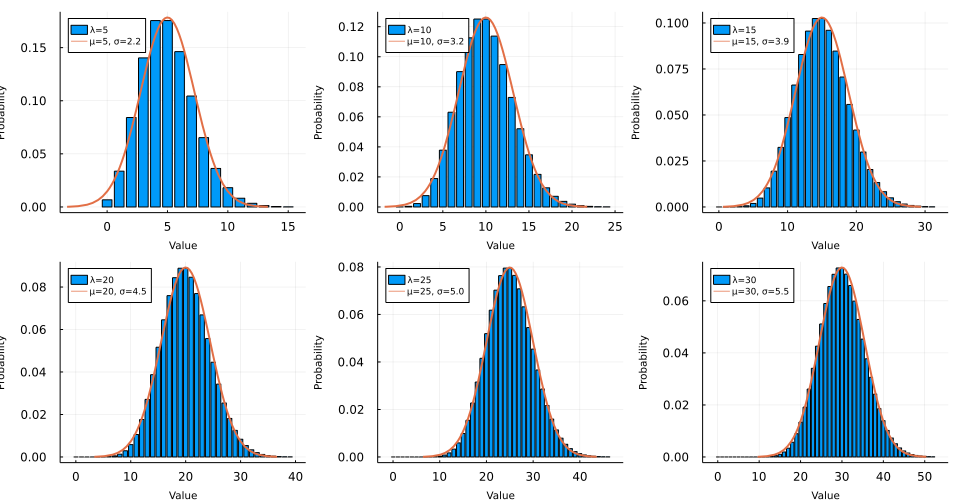

In [11]:
λs = 5:5:30
plt_array = Array{Plots.Plot{Plots.GRBackend},1}()
for i in λs
    p = plot(Poisson(i), label="λ=$(i)", seriestype=:bar,
        xlabel="Value", xguidefontsize=7, barwidth=2,
        ylabel="Probability", yguidefontsize=7, legend=:topleft
    )
    plot!(Normal(i, sqrt(i)), lw=2, label="μ=$(i), σ=$(round(sqrt(i), digits=1))")
    push!(plt_array, p)
end

lyt = @layout[a b c; d e f]
plot(plt_array..., layout=lyt, size=(960, 500), # unpacking iterator is called "splatting" in Julia and uses the syntax ... 
    legendfontsize=6
) 

Likewise, the binomial tends to a Gaussian with $\mu = np$ and $\sigma = \sqrt{np(1-p)}$. Smaller $p$ require bigger $N$ for the approximation to be valid. 

## The Multidimensional Gaussian Distribution
Consider a distribution in $n$ variables, denoted $x_{(1)}, x_{(2)}, \dots, x_{(n)}$. We can write these as a vector $\vec{x}$, and the means $\mu_{(1)}, \mu_{(2)}, \dots, \mu_{(n)}$ written as $\vec{\mu}$

We can write the general form of a multi-dimensional Gaussian as an exponential of a quadratic form containing $x_{(i)}^2$, linear cross terms of the form $x_{(i)}x_{(j)}$, as well as a constant.
$$
    P(\vec{x}) \propto \exp\left[ -\frac{1}{2}(\vec{x}^T - \vec{\mu}^T) \mathbf{A} (\vec{x} - \vec{\mu})  \right]
$$
where we impose $\mathbf{A}$ be a symmetric matrix: $A_{ij} = A_{ji}$

<b>WLOG: $\mu_{(i)}= 0$</b>

<b>A</b> may be diagonal, meaning all variables are independent and the cross terms are zero. In this case, the above expression factorizes into:
$$
    \exp\left[ -\frac{1}{2}(\tilde{x} - \tilde{\mu}) \mathbf{A} (x - \mu)  \right] = \Pi_{k=1}^{n} e^{-A_{kk}x_k^2 / 2}
$$
As <b>A</b> is diagonal, it can be written in the form 
$$
    \mathbf{A} = \mathbf{V}^{-1}
$$

Considering the general case where <b>A</b> might not be diagonal, the equation still holds. Even if <b>A</b> is not diagonal, a unitary matrix <b>U</b> () can always be found to diagonalize a symmetric matrix <b>A</b>: 
$$
    \mathbf{A}' = \mathbf{UAU^T} \qquad \mathbf{A}'\text{ diagonal} 
$$
Meaning the exponent $\vec{x}^T \mathbf{A} \vec{x}$ can be written as $\vec{x}^T \mathbf{U}^T \mathbf{U A U^T U }\vec{x}$, which turns out to be the inverse error matrix.  

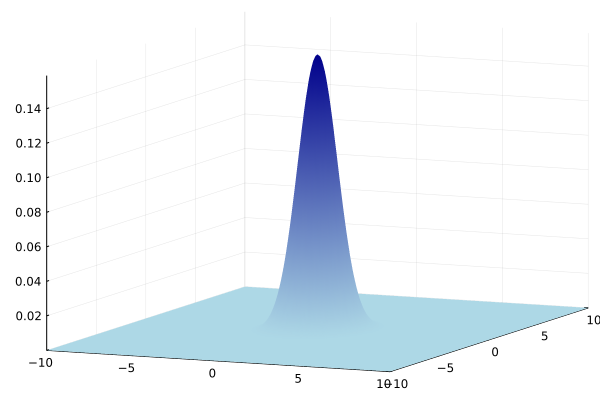

In [24]:
σ₁ = 1
σ₂ = 1
Σ = [inv(σ₁^2) 0 ; 0 inv(σ₂^2)]
μ_vec = [0, 0]
Multivariate_Normal = MvNormal(μ_vec, Σ)
Z = [pdf(Multivariate_Normal, [i, j]) for i in -10:0.1:10, j in -10:0.1:10]
plot(collect(-10:0.1:10), collect(-10:0.1:10), Z, linetype=:surface, legend=false, color=:blues)

### Other Distributions
#### The Uniform Distribution
Also known as the rectangular distribution, the uniform distribution describes a probability which is constant over a certain range and zero outside it. 
$$
    P(x) = \cases{ \frac{1}{b-a} & for a $\leq$ x $\leq$ b \\ 0 & elsewhere}
$$
<b>Remark:</b>
- Mean: $(a+b)/2$
- Variance: $V(x) = \frac{(b-a)^2}{12}$
- The standard deviation is the width divided by $\sqrt{12}$
- Conventionally one calculates the FWHM by assuming that the PDF at a or b is equal to $\big(2(b-a)\big)^{-1}$

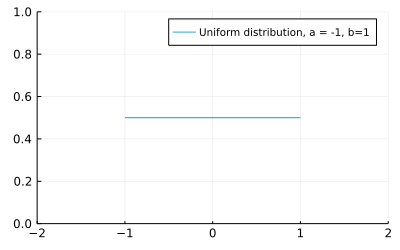

In [25]:
plot(Uniform(-1,1), ylims=(0,1), xlims=(-2,2), size=(400,250), label="Uniform distribution, a = -1, b=1", legendfontsize=7)

#### The Weibull Distribution
Initially introduced to describe failure rates in ageing lightbulbs, the Weibull distribution is useful when parametrising functions which rise as x increases from 0 and then rapidly falls off again.
$$
    P(x; \alpha, \beta) = \alpha \beta (\alpha x)^{\beta - 1}e^{-(\alpha x)^\beta}
$$
$\alpha$ is just a scale factor and $\beta$ expresses the sharpness of the peak. Trivially, $\beta = 1$ gives the exponential function. 

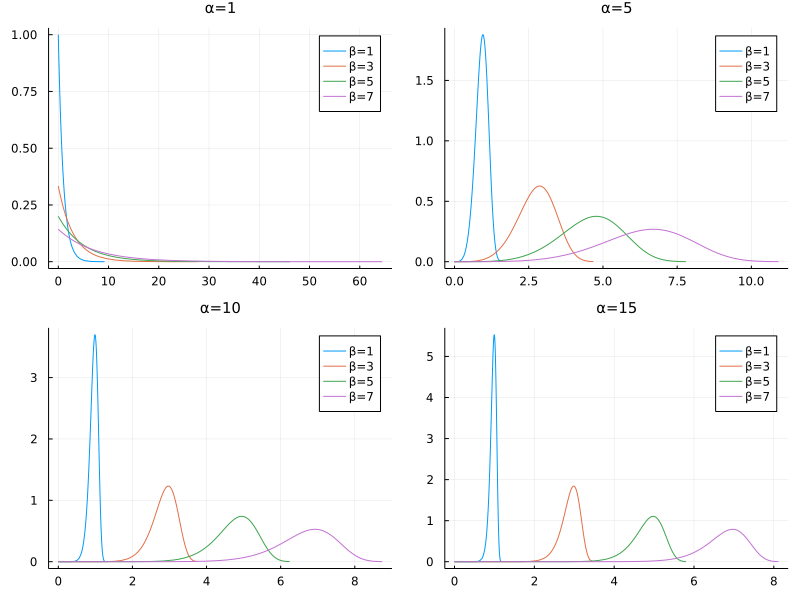

In [48]:
α1 = plot(Weibull(1, 1), label="β=1", title="α=1")
for i in 3:2:7
    plot!(Weibull(1, i), label="β=$(i)")
end

α2 = plot(Weibull(5, 1), label="β=1", title="α=5")
for i in 3:2:7
    plot!(Weibull(5, i), label="β=$(i)")
end

α3 = plot(Weibull(10, 1), label="β=1", title="α=10")
for i in 3:2:7
    plot!(Weibull(10, i), label="β=$(i)")
end

α4 = plot(Weibull(15, 1), label="β=1", title="α=15")
for i in 3:2:7
    plot!(Weibull(15, i), label="β=$(i)")
end

lyt = @layout[a b ; c d]
plot(α1, α2, α3, α4, size=(800, 600), layout=lyt, titlefontsize=10)

#### The Cauchy/Lorentz/Breit-Wigner Distribution
$$
    F(m; M, \Gamma) = \frac{1}{2\pi}\frac{\Gamma}{(m-M)^2 + (\Gamma/2)^2} \qquad \qquad F(z) = \frac{1}{\pi}\frac{1}{1+z^2}
$$
The Breit-Wigner (name used in nuclear/particle physics) or Lorentzian (general physics), or alternatively Cauchy (mathematicians) distribution is used primarily by nuclear phycisists to give a distribution of particles of mass $m$ due to a resonance of mass $M$ and width $\Gamma$. 

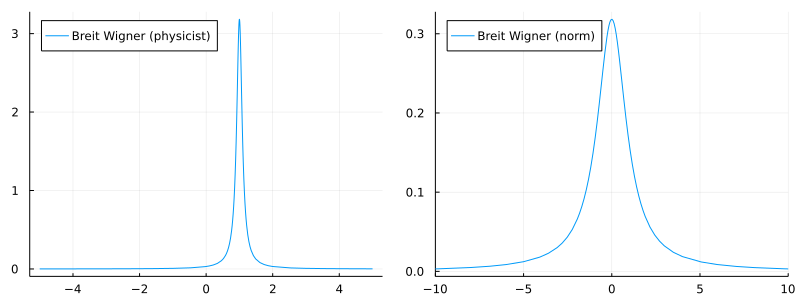

In [155]:
my_pdf(m, M, Γ) = 1/(2π) * Γ / ((m-M)^2 + (Γ/2)^2)
p0 = plot(x->my_pdf(x, 1, 0.2), label="Breit Wigner (physicist)")
p1 = plot(x->pdf(Cauchy(0,1), x), xlim=(-10, 10), label="Breit Wigner (norm)")
plot(p0, p1, size=(800, 300), legend=:topleft, legendfontsize=8)

<b>TODO</b> (Donega): The Multinomial Distribution, The Exponential Distribution, The Lognormal Distribution

######## Shows up later: The $\chi^2$ Distribution and its Reduced Form, The F-Distribution, The Student t-Distribution

### Limits between the different distributions
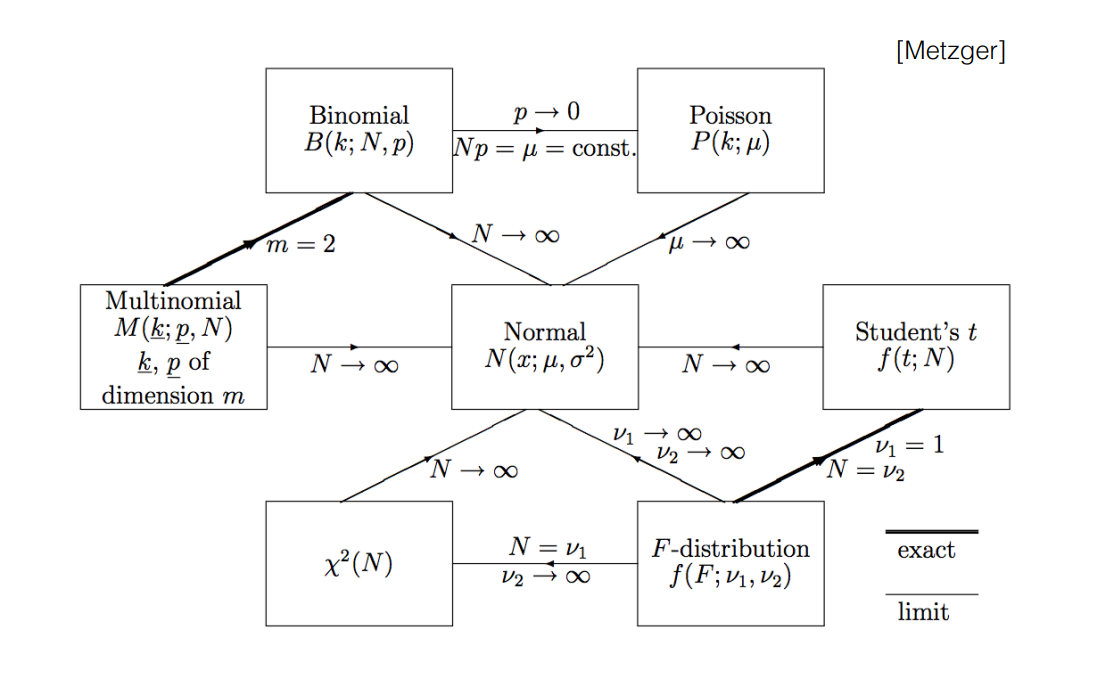

## Problems 
##### 3.1
A defense system is 99.5% efficient in intercepting missiles. 

a) What is the probability that it will intercept all 100 missiles launched against it? 

b) How many missiles must an aggressor launch to have better than evens chance of one or more penetrating the defences (50% chance of letting one through)? 

<b> Solution: </b>
Use the binomial formula for the probability of $r$ successes out of $n$ tries, each with a probability $p$. 

Note one success occurs with probability 5% (1-0.995). Thus we have
 - $r = 0$
 - $n = 100$
 - $p = 0.05$

In [75]:
# a) We calculate the probability of zero successes.
println("The expected probability of zero successes ∼" , 
         round((1-0.995)^(0) * (0.995)^(100 - 0) * binomial(100, 0)*100, digits=2), "%" )

The expected probability of zero successes ∼60.58%
The expected probability of zero successes ∼60.58%


For b), instead of explicity finding the amount of missiles for which we have 1 or more successes, we calculate the amount of missiles for which the chance of zero successes is equal to 50%, namely:
$$
    50\% \overset{!}{=} 0.995^{x}.
$$
Note that the binomial coefficient $\binom{n}{0}$ is equal to 1 $\forall n \in \mathbb{N}$ and we are looking at 0 successes. Thus:
$$
    x \cdot \log(0.995) = \log(0.5)
$$

In [76]:
x = log(0.5) / log(0.995)
# Meaning that the smallest integer satisfying a more than 50% chance of one getting through is 138. 

138.28257298606084

138.28257298606084

##### 3.2
How many missiles are needed for the chance of <i> more than 2</i> missiles to hit to be greater than 50%? 

<b> Solution: </b> <br>
We calculate the three first parts of the binomial formula, r=0, 1, 2: 

First term: $P(0; 0.005, x) = \binom{x}{0}\cdot 0.005^0 \cdot 0.995^x = 0.995^x$

Second term: $P(1; 0.005, x) = \binom{x}{1} \cdot 0.005^1 \cdot 0.995^{x-1} = 0.005\cdot x\cdot 0.995^{x-1}$

Third term: $P(2; 0.005, x) = \binom{x}{2} \cdot 0.005^2 \cdot 0.995^{x-2} = 0.005^2 \frac{\cdot x(x-1)}{2} 0.995^{x-2}$

Thus
$$
    1 = 0.995^{x-2} \Big(2 \cdot 0.995^2 + 0.01 \cdot x \cdot 0.995 + 0.005^2 \cdot x(x-1) \Big) \\
    0.995^{2-x} = \Big(2 \cdot 0.995^2 + 0.01 \cdot x \cdot 0.995 + 0.005^2 \cdot x(x-1) \Big) 
$$
I don't think this can be solved analytically, so here is a numerical solution (you can also just brute force it)

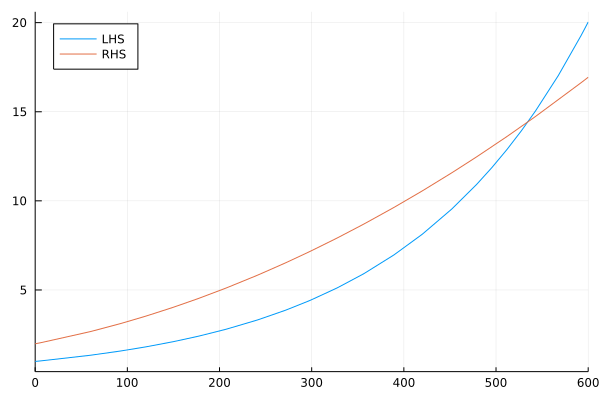

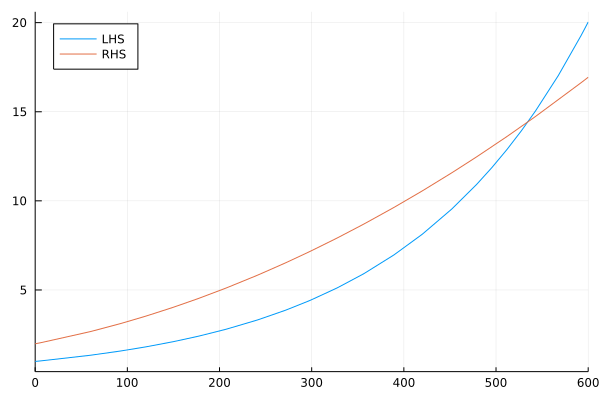

In [77]:
# Declaring RHS and LHS functions
LHS = x->0.995^(2-x)
RHS = x->2*0.995^2 + 0.01*x*0.995+0.005^2*x*(x-1)

# Plotting the results
plot(LHS, xlims=(0,600), label="LHS", legend = :topleft)
plot!(RHS, label="RHS")

Intersection between the two curves: 534.4749581480645
This means the smallest integer for which the above equation is fulfilled, is 535.0Intersection between the two curves: 534.4749581480645
This means the smallest integer for which the above equation is fulfilled, is 535.0



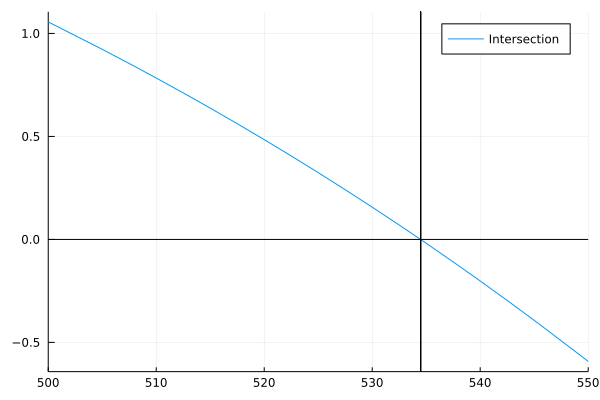

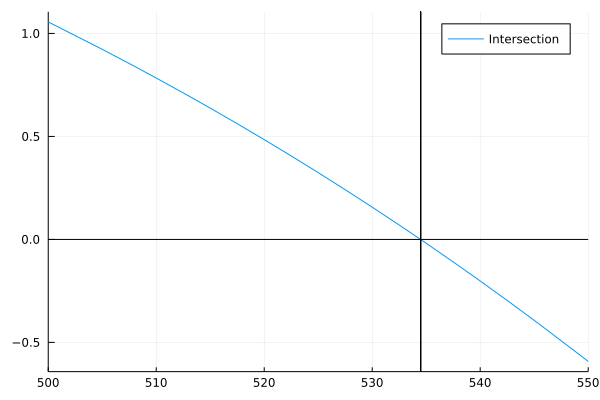

In [78]:
# Defining the function describing the intersect of the two sides
intersection_function(x) = 2*0.995^2 + 0.01*x*0.995 + 0.005^2*x*(x-1) - 0.995^(2-x) 

# Finding the zero of the two functions with the bisection method
zero = find_zero(intersection_function, (500,550), Roots.Bisection())
println("Intersection between the two curves: ",  zero)
println("This means the smallest integer for which the above equation is fulfilled, is $(round(ceil(zero), digits=0))")
plot(intersection_function, xlims=(500,550), label="Intersection", legend=:topright)
vline!(x->zero, label=:none, c=:black)
plot!(x->0, label=:none, c=:black)

In [79]:
# Brute force:
prob(x) = 0.995^(x-2) * ( 0.995^2  + 0.005*x*0.995 + 0.005^2 * x*(x-1)/2)
mask = [prob(x) for x in 0:1000] .< 0.5;
println("The first integer number of fired missiles for which the probability of getting 2 or more missiles through is >50%, is: ", 
    first(collect(0:1000)[mask]))

The first integer number of fired missiles for which the probability of getting 2 or more missiles through is >50%, is: 535
The first integer number of fired missiles for which the probability of getting 2 or more missiles through is >50%, is: 535


##### 3.3
During a meteor shower, meteors fall at a rate of 15.7 per hour. What is the probability of observing less than 5 in a 30 minute interval? 

<b> Solution: </b> <br> 
First we need to note that a Poisson distribution is characterized by a <i> constant </i> rate $\lambda$. Thus, this can also be partitioned as we wish. For instance, in this example we have 15.7 counts per hour, but we can equivalently say that the expected count for a time interval of 30 minutes is $7.85$ and for 2 hours is $31.4$.

We want to know the probability of observing less than or equal to 4 (strictly less than 5). This is done by calculating the CDF for the Poisson distribution pictured below. 

The CDF until 4 gives: ∼0.1085
The CDF until 4 gives: ∼0.1085


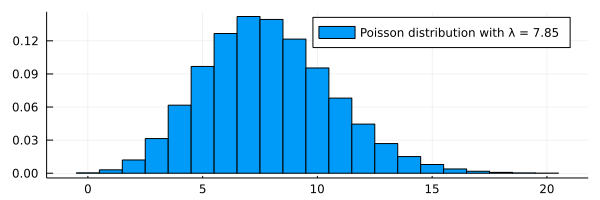

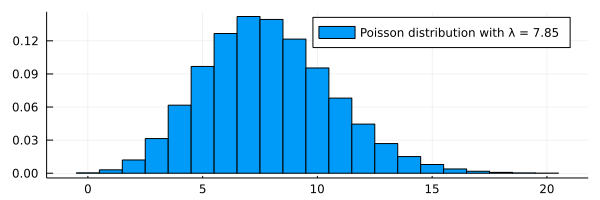

In [80]:
println("The CDF until 4 gives: ∼", round(cdf(Poisson(15.7/2), 4), digits=4))
plot(Poisson(15.7/2), seriestype=:bar, bar_width=1, size=(600,200), label="Poisson distribution with λ = $(15.7/2)")

##### 3.4
Repeat the previous problem with the Gaussian approximation of the Poisson distribution. 

<b> Solution: </b> <br> 
$\mu = 7.85$, $\sigma = \sqrt{7.85}$. Now we either compute the CDF of the Gaussian with these values, or we note that $4$ lies $1.2\sigma$ from the mean. The CDF can now be computed using tables. 

In [81]:
println("The CDF until 4 gives: ∼", round(cdf(Normal(7.85, sqrt(7.85)), 4.5), digits=4)) 
# for the Gaussian approximation of the Poisson we take the value between the two corresponding 
# Poisson values (in our case between 4 and 5 -> 4.5) as the upper bound of our CDF. 

The CDF until 4 gives: ∼0.1159
The CDF until 4 gives: ∼0.1159


In [82]:
sqrt(7.85)

2.80178514522438

2.80178514522438

##### 3.5
A student is trying to hitch a lift. Cars pass at random intervals, at an average rate of 1 per minute. 

The probability of a car giving a lift is 1\%. What is the probability that the student will be waiting after 
- a) 60 cars have passed
- b) 1 hour

<b> Solution: </b> <br>
For a) we have a binomial formula for zero successes. $P(0; 0.01, 60) = \binom{60}{0}\cdot 0.01^0 \cdot 0.99^{60} = 0.99^{60}$

For b) we use the Poisson formula assuming zero successes. Note that the expected amount of cars in 1 hour is 60, meaning the average amount of cars picking someone up is $\lambda = 0.6$. Then we have: $P(r=0; \lambda = 0.6) = \frac{e^{-\lambda} \lambda^r}{r!} = \frac{e^{-0.6} \lambda^{0}}{0!}$

In [83]:
println("Probability of zero successes after 60 cars is: ", round(0.99^60 * 100, digits=2), "%", " (Binomial)")
println("Probability of zero successes after 60 cars is: ", round(exp(-0.6) * 100, digits=2), "%", " (Poisson)")

Probability of zero successes after 60 cars is: 54.72% (Binomial)
Probability of zero successes after 60 cars is: 54.88% (Poisson)
Probability of zero successes after 60 cars is: 54.72% (Binomial)
Probability of zero successes after 60 cars is: 54.88% (Poisson)


Why do we apply the different formulas? Because the situations are distinctly different. 

In the first case we are assuming a constant probability of each event occuring, while in the second we are using a constant rate of successes per hour. 

##### 3.6
- a) What is the probability of a value lying more than $1.23 \sigma$ from the mean?
- b) What is the probability of a value lying more than $2.43 \sigma$ above the mean? 
- c) What is the probability of a value lying less than $1.09 \sigma$ below the mean?
- d) What is the probability of a value lying above a point $0.45 \sigma$ below the mean?
- e) What is the probability that a value lies more than $0.5 \sigma$ but less than $1.5\sigma$ from the mean?
- f) What is the probability that a value lies above $1.2\sigma$ on the low side of the mean, and below $2.1\sigma$ on the high side? 
- g) Within how many standard deviations does the probability of a value occuring equal 50\%?
- h) How many standard deviations correspond to a one-tailed probability of 99\%?

In [84]:
distr = Normal(0, 1)
println( "a): ",  round( 100-(cdf(distr, 1.23) - cdf(distr, -1.23))*100 , digits=2), "%")
println( "b): ",  round( ccdf(distr, 2.43) * 100 , digits = 2), "%")
println( "c): ",  round( cdf(distr, -1.09) * 100 , digits = 2), "%")
println( "d): ",  round( cdf(distr, 0.45) * 100 , digits = 2), "%")
println( "e): ",  round( (cdf(distr, 1.5) - cdf(distr, 0.5))*200, digits = 2), "%")
println( "f): ",  round( (cdf(distr, 2.1) - cdf(distr, -1.2))*100, digits = 2), "%") 
# f) in Barlow ~86.70: we get ~86.707
println( "g): ", round((quantile(distr, 0.75) - quantile(distr, 0.25))/2, digits=4), "σ") #0.675σ -> round function is weird
println( "h): ", round(quantile(distr, 0.99), digits=2), "σ")

a): 21.87%
b): 0.75%
c): 13.79%
d): 67.36%
e): 48.35%
f): 86.71%
g): 0.6745σ
h): 2.33σ
a): 21.87%
b): 0.75%
c): 13.79%
d): 67.36%
e): 48.35%
f): 86.71%
g): 0.6745σ
h): 2.33σ
